LINEAR REGRESSION - PART 2
(using House sales Prediction dataset)

1. Import libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

2. Loading and describing the Dataset

In [6]:
data = np.loadtxt("house_sales_data/House_Sales_Prediction_data.txt", delimiter = ",")

In [7]:
data

array([[  1500., 158900.],
       [  1700., 169850.],
       [  1750., 178950.],
       [  1800., 178650.],
       [  1820., 180000.],
       [  1920., 186850.],
       [  1450., 150000.],
       [  1590., 149870.],
       [  1596., 158620.],
       [  1623., 159990.],
       [  1878., 189680.],
       [  1658., 168980.],
       [  1720., 170000.],
       [  1985., 190000.],
       [  2000., 198510.],
       [  2100., 200000.],
       [  2050., 193580.],
       [  1990., 200000.],
       [  1965., 195180.],
       [  1970., 198680.],
       [  2120., 201650.],
       [  2200., 220000.],
       [  2156., 216510.],
       [  1269., 138550.],
       [  1489., 149850.],
       [  1785., 179850.],
       [  1965., 196280.],
       [  1948., 195680.],
       [  2008., 200000.],
       [  2079., 205880.],
       [  2116., 210000.],
       [  2230., 220000.],
       [  2200., 219850.],
       [  2220., 222000.],
       [  2365., 235680.],
       [  2325., 239580.],
       [  2396., 240000.],
 

In [8]:
X = data[:, 0]
Y = data[:, 1].reshape(X.size, 1)

In [9]:
#vstack --> used to change the dimension of X
X= np.vstack((np.ones((X.size, )), X)).T

In [10]:
print(X.shape)
print(Y.shape)

(45, 2)
(45, 1)


3. Visualizing the columns of the dataset

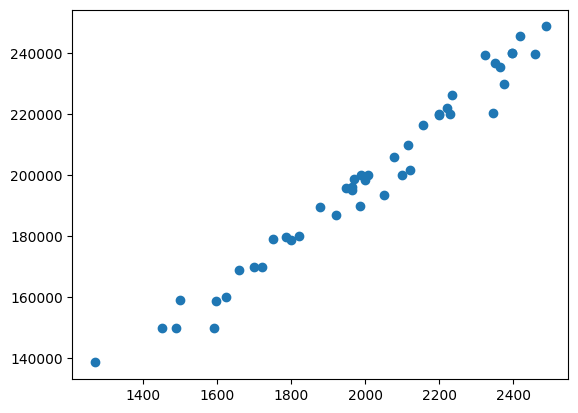

In [11]:
plt.scatter(X[:,1], Y)

IMPLEMENTING LINEAR REGRESSION
* In linear regression, our aim is to predict outcomes by fitting a straight line to our dataset.
* To evaluate the accuracy of our predictions, we use cost/loss function, evaluating the difference between predicted and actual values.
* Here goal is to minimize this cost/loss function, representing the error.
* To achieve the minimum value we go for gradient descent algorithm.
* This algorithm iteratively adjusts parameters to decrease the cost/loss function.
* Through successive iterations, the algorithm converges towards a local minimum, optimizing our model.


4. Creating a linear regression model
(implementing cost function and gradient decent function)

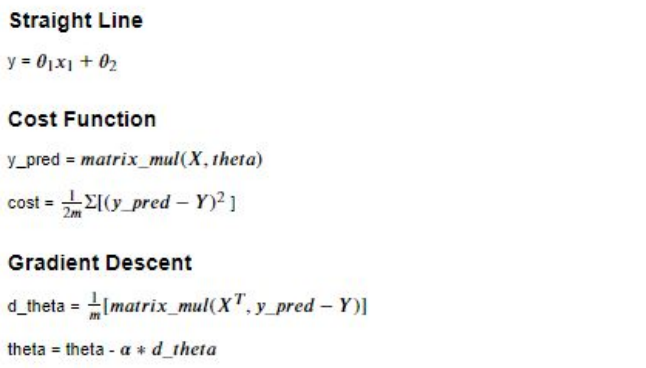

In [12]:
def model(X, Y, learning_rate, iteration):
    m= Y.size
    theta = np.zeros((2,1))
    cost_list = []
    
    for i in range(iteration):
        
        #cost function
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        
        #gradient decent
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        
        cost_list.append(cost)
        
    return theta, cost_list

5. Initialize the parameters and Train the model 

In [13]:
iteration = 100
learning_rate = 0.00000005
theta , cost_list = model(X, Y, learning_rate=learning_rate, iteration=iteration )

6. After training the model for 100 iterations, we testing i.e prediction is done :- 

In [14]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1,2800], [1, 3400], [1, 5000]])
for house in new_houses :
    print("Price of house - ",house[1], " area ---> Rupee ", round(np.dot(house, theta)[0],2))

Price of house -  1547  area ---> Rupee  153759.0
Price of house -  1896  area ---> Rupee  188446.7
Price of house -  1934  area ---> Rupee  192223.59
Price of house -  2800  area ---> Rupee  278296.8
Price of house -  3400  area ---> Rupee  337931.81
Price of house -  5000  area ---> Rupee  496958.52


7. Plotting cost vs iteration graph 
(we can clearly see the minimizing value of cost over iterations, that's why we get goos prediction values)

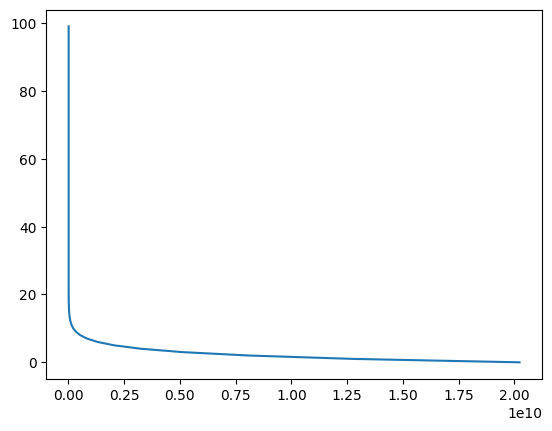

In [15]:
ranges = np.arange(0, iteration)
plt.plot(cost_list, ranges)
plt.show()